<a href="https://colab.research.google.com/github/mariajuliawegelin/TCC/blob/main/TCC_MariaJulia_An%C3%A1lises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho de Conclusão de Curso**
##Pós graduação em Ciência de Dados aplicada a Políticas Públicas
###Maria Júlia Castro Wegelin

## 1 - Carregar os dados e bibliotecas de código

In [72]:
#Importar bibliotecas de código:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Carregamento das bases tratadas no caderno https://colab.research.google.com/drive/1b_ouAZR-QgEVKZGqsAuTd09nmjVNplOd?usp=sharing
# Dados anuais de 2011 a 2020:
df = pd.read_csv('https://raw.githubusercontent.com/mariajuliawegelin/TCC/main/df_2.csv', decimal='.', sep=',', encoding= 'utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55658 entries, 0 to 55657
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CódigodoMunicípio                          55658 non-null  int64  
 1   Município                                  55658 non-null  object 
 2   Estado                                     55658 non-null  object 
 3   AnodeReferência                            55658 non-null  int64  
 4   Abrangência                                55658 non-null  object 
 5   Tipodeserviço                              55658 non-null  object 
 6   Naturezajurídica                           55658 non-null  object 
 7   POP_TOTAL                                  55658 non-null  float64
 8   POP_TOTAL_AGUA                             51714 non-null  float64
 9   POP_TOTAL_ESGOTO                           24114 non-null  float64
 10  DURACAO_MEDIA_PARALISA

In [74]:
# Dados da variação entre 2010 e 2020, com LAT, LON, ALT, e IDH de 2010 :
df_10_anos = pd.read_csv('https://raw.githubusercontent.com/mariajuliawegelin/TCC/main/df_3.csv', decimal='.', sep=',', encoding= 'utf-8')
df_10_anos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CódigodoMunicípio  5997 non-null   int64  
 1   Município          5997 non-null   object 
 2   Estado             5997 non-null   object 
 3   AnodeReferência    5997 non-null   int64  
 4   Tipodeserviço      5997 non-null   object 
 5   Naturezajurídica   5997 non-null   object 
 6   POP_TOTAL          5997 non-null   float64
 7   POP_TOTAL_ESGOTO   2838 non-null   float64
 8   POP_TOTAL_AGUA     5411 non-null   float64
 9   REGIAO             5997 non-null   object 
 10  DIF_AG_2011_2020   5034 non-null   float64
 11  DIF_ES_2011_2020   1867 non-null   float64
 12  INV_TOTAL          5997 non-null   float64
 13  INV_TOTAL_AG       5997 non-null   float64
 14  INV_TOTAL_ES       5997 non-null   float64
 15  INV_TOTAL_PCP      3287 non-null   float64
 16  INV_TOTAL_AG_PCP   3292 

## 2 - Análise acesso a abastecimento de água e esgoto

In [75]:
# Filtrar dados de 2011 e 2020:
anos = [2011, 2020]
df_2011_e_2020 = df[df.AnodeReferência.isin(anos)]

df_2011_e_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11172 entries, 0 to 55657
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CódigodoMunicípio                          11172 non-null  int64  
 1   Município                                  11172 non-null  object 
 2   Estado                                     11172 non-null  object 
 3   AnodeReferência                            11172 non-null  int64  
 4   Abrangência                                11172 non-null  object 
 5   Tipodeserviço                              11172 non-null  object 
 6   Naturezajurídica                           11172 non-null  object 
 7   POP_TOTAL                                  11172 non-null  float64
 8   POP_TOTAL_AGUA                             10384 non-null  float64
 9   POP_TOTAL_ESGOTO                           4798 non-null   float64
 10  DURACAO_MEDIA_PARALISA

2.1 Abastecimento de água

In [76]:
#Filtrar Tipo de serviço = água

# Tirando linha com POP_TOTAL_AGUA = NAN (São as linhas que tratam somente de esgoto)

df_2011_e_2020_AG = df_2011_e_2020[df_2011_e_2020['POP_TOTAL_AGUA'].notna()]

df_2011_e_2020_AG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10384 entries, 0 to 55657
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CódigodoMunicípio                          10384 non-null  int64  
 1   Município                                  10384 non-null  object 
 2   Estado                                     10384 non-null  object 
 3   AnodeReferência                            10384 non-null  int64  
 4   Abrangência                                10384 non-null  object 
 5   Tipodeserviço                              10384 non-null  object 
 6   Naturezajurídica                           10384 non-null  object 
 7   POP_TOTAL                                  10384 non-null  float64
 8   POP_TOTAL_AGUA                             10384 non-null  float64
 9   POP_TOTAL_ESGOTO                           4011 non-null   float64
 10  DURACAO_MEDIA_PARALISA

In [77]:
#verificar se a variável PERCENT_AG tem NAN
check_for_any_nan= df_2011_e_2020_AG['PERCENT_AG'].isna().any().any()
print(check_for_any_nan)

False


Text(0, 0.5, 'Percentual da população com abastecimento de água')

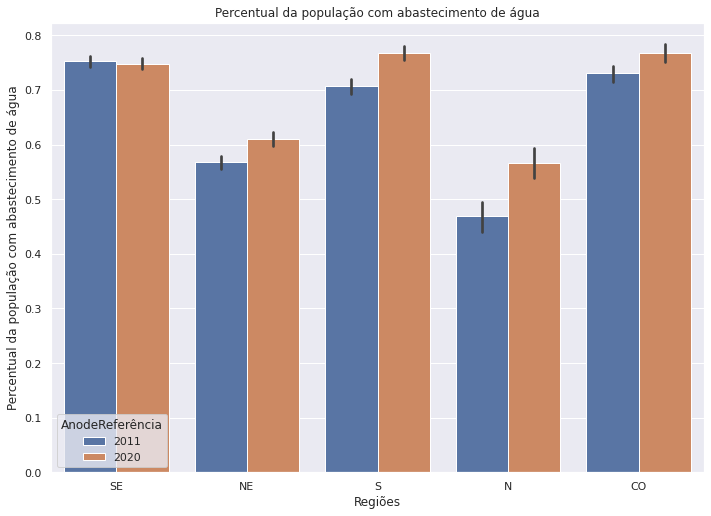

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='REGIAO', y='PERCENT_AG', hue='AnodeReferência', data=df_2011_e_2020_AG.sort_values(by='PERCENT_AG'))

plt.title('Percentual da população com abastecimento de água')
plt.xlabel("Regiões")
plt.ylabel('Figura X - Percentual da população com abastecimento de água')

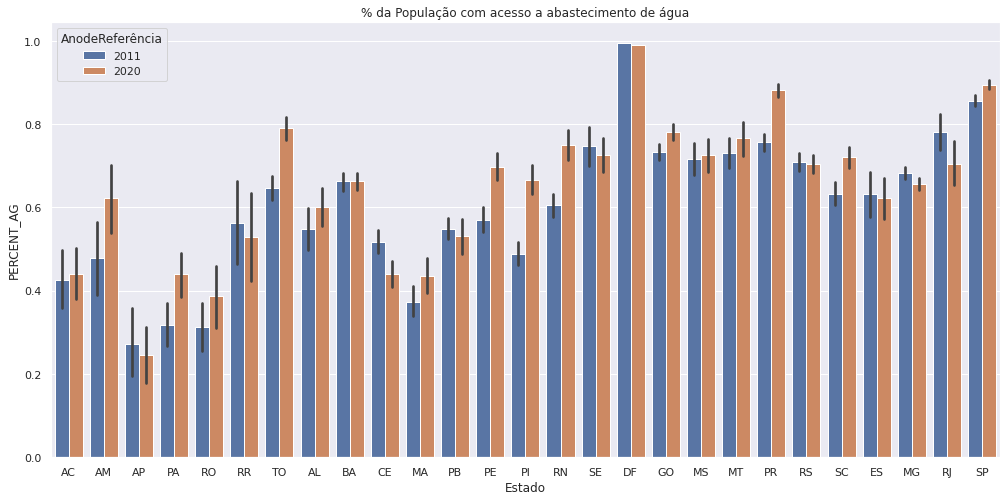

In [91]:
plt.figure(figsize=(17,8))
sns.barplot(x="Estado", y="PERCENT_AG", hue= 'AnodeReferência', data=df_2011_e_2020_AG, order=['AC', 'AM','AP', 'PA' , 'RO', 'RR', 'TO', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'DF', 'GO', 'MS', 'MT', 'PR', 'RS', 'SC', 'ES', 'MG', 'RJ', 'SP'])
plt.title("Figura X - % da População com acesso a abastecimento de água")
plt.show()

In [ ]:
# 10 maiores avanços em abastecimento de água:

df_10_anos.nlargest(10, 'DIF_AG_2011_2020')[['Município','Estado', 'DIF_AG_2011_2020' ]]

In [ ]:
# 10 menores avanços em abastecimento de água:

df_10_anos.nsmallest(10, 'DIF_AG_2011_2020')[['Município','Estado', 'DIF_AG_2011_2020' ]]

2.2 Acesso a esgotamento sanitário

In [ ]:
#Filtrar Tipo de serviço = esgoto

# Tirando linha com POP_TOTAL_ESGOTO = NAN (São as linhas que tratam somente de água)

df_2011_e_2020_ES = df_2011_e_2020[df_2011_e_2020['POP_TOTAL_ESGOTO'].notna()]

df_2011_e_2020_ES.info()

In [54]:
#verificar se essa variável tem NAN
check_for_any_nan= df_2011_e_2020_ES['PERCENT_ES'].isna().any().any()
print(check_for_any_nan)

False


In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='REGIAO', y='PERCENT_ES', hue='AnodeReferência', data=df_2011_e_2020_ES )

plt.title('Figura X - Percentual da população com acesso a esgotamento sanitário')
plt.xlabel("Regiões")
plt.ylabel('Percentual da população com acesso a esgotamento sanitário')

In [ ]:
# sns.barplot(x='Estado', y='PERCENT_ES', hue='AnodeReferência', data=df_2011_2020.sort_values(by='PERCENT_ES')  )

# plt.title('Percentual da população com acesso a esgotamento sanitário')
# plt.xlabel("UF")
# plt.ylabel('Percentual da população com acesso a esgotamento sanitário')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="Estado", y="PERCENT_ES", hue='AnodeReferência', data=df_2011_2020.sort_values(by='PERCENT_ES'))

plt.title("Figura X - Aumento percentual de inclusões comparado ao número total de cadastrados")
plt.xlabel("UF")
plt.ylabel("Aumento percentual")

In [119]:
# 10 maiores avanços em acesso a esgoto:

df_10_anos.nlargest(10, 'DIF_ES_2011_2020')[['Município','Estado', 'DIF_ES_2011_2020' ]]

,Município,Estado,DIF_ES_2011_2020
2719,Espírito Santo do Dourado,MG,0.974027
3990,Macatuba,SP,0.970141
1670,Tamandaré,PE,0.956531
3607,Mendes,RJ,0.913566
3050,Olaria,MG,0.902517
1451,Teixeira,PB,0.892225
3597,Laje do Muriaé,RJ,0.813682
2110,Itororó,BA,0.808846
4039,Neves Paulista,SP,0.779013
3696,Álvares Florence,SP,0.768851


In [ ]:
# 10 menores avanços em acesso a esgoto:

df_10_anos.nsmallest(10, 'DIF_ES_2011_2020')[['Município','Estado', 'DIF_ES_2011_2020' ]]

## 3 - Análise dos investimentos

In [106]:
# Gráfico do valor total dos investimentos por Região:

df_10_anos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CódigodoMunicípio  5997 non-null   int64  
 1   Município          5997 non-null   object 
 2   Estado             5997 non-null   object 
 3   AnodeReferência    5997 non-null   int64  
 4   Tipodeserviço      5997 non-null   object 
 5   Naturezajurídica   5997 non-null   object 
 6   POP_TOTAL          5997 non-null   float64
 7   POP_TOTAL_ESGOTO   2838 non-null   float64
 8   POP_TOTAL_AGUA     5411 non-null   float64
 9   REGIAO             5997 non-null   object 
 10  DIF_AG_2011_2020   5034 non-null   float64
 11  DIF_ES_2011_2020   1867 non-null   float64
 12  INV_TOTAL          5997 non-null   float64
 13  INV_TOTAL_AG       5997 non-null   float64
 14  INV_TOTAL_ES       5997 non-null   float64
 15  INV_TOTAL_PCP      3287 non-null   float64
 16  INV_TOTAL_AG_PCP   3292 

Text(0, 0.5, 'Investimento per capita total')

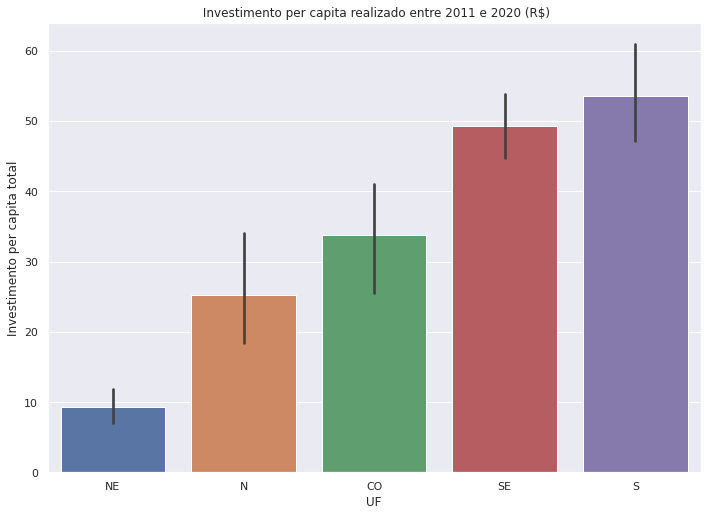

In [66]:
# Investimento total per capita por região

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="REGIAO", y="INV_TOTAL_PCP", data=df_10_anos.sort_values(by='INV_TOTAL_PCP'))

plt.title(" Figura X - Investimento per capita realizado entre 2011 e 2020 (R$)")
plt.xlabel("UF")
plt.ylabel("Investimento per capita total")

Text(0, 0.5, 'Investimento per capita total')

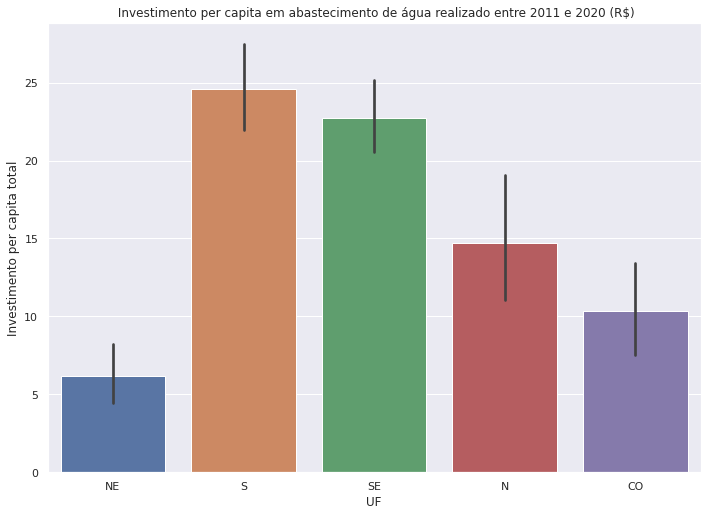

In [69]:
# Investimento em abastecimento de água per capita por região

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="REGIAO", y="INV_TOTAL_AG_PCP", data=df_10_anos.sort_values(by='INV_TOTAL_AG_PCP'))

plt.title("Figura X - Investimento per capita em abastecimento de água realizado entre 2011 e 2020 (R$)")
plt.xlabel("UF")
plt.ylabel("Investimento per capita total")

Text(0, 0.5, 'Investimento per capita total')

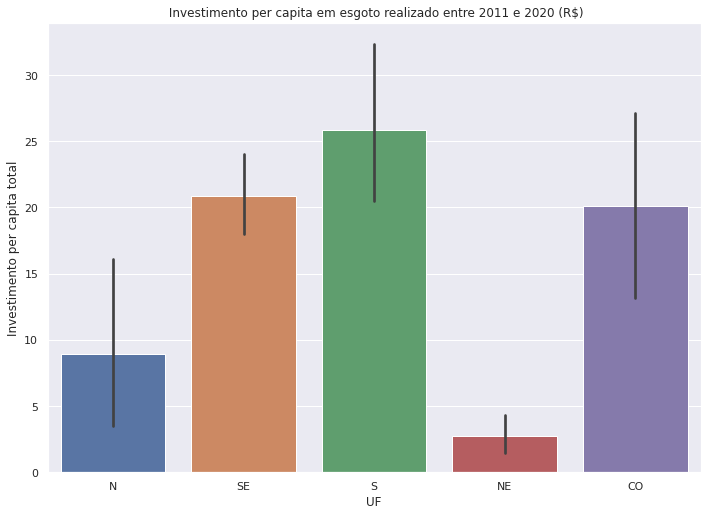

In [70]:
# Investimento em esgoto per capita por região

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="REGIAO", y="INV_TOTAL_ES_PCP", data=df_10_anos.sort_values(by='INV_TOTAL_ES_PCP'))

plt.title("Figura X - Investimento per capita em esgoto realizado entre 2011 e 2020 (R$)")
plt.xlabel("UF")
plt.ylabel("Investimento per capita total")

In [95]:


# Filtrar dados de 2011:
ano_2011 = [2011]
df_2011 = df[df.AnodeReferência.isin(ano_2011)]


In [ ]:
# Juntar base de 2011 com base de investimentos por município:

df_2 = df_10_anos.merge(df_2011, on = ["CódigodoMunicípio", "Município", "Estado", "Tipodeserviço", "Naturezajurídica" ], how = "left")
df_2.info()


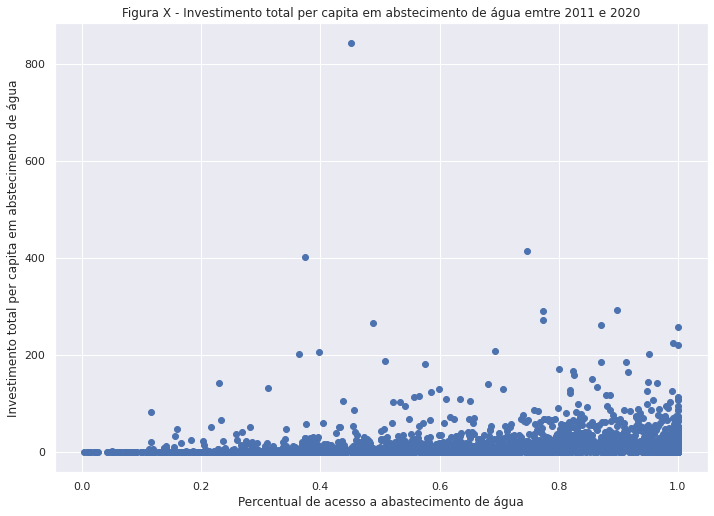

In [109]:
# Relação entre % de abastecimento de água em 2011 e os investimentos per capita em água realizados nos 10 anos seguintes

fig, ax = plt.subplots()
ax.scatter(df_2['PERCENT_AG'],df_2['INV_TOTAL_AG_PCP'])
ax.set_xlabel('Percentual de acesso a abastecimento de água')
ax.set_ylabel('Investimento total per capita em abstecimento de água')
ax.set_title('Figura X - Relação entre % de abastecimento de água em 2011 e os investimentos per capita em água realizados realizados emtre 2011 e 2020')
plt.show()

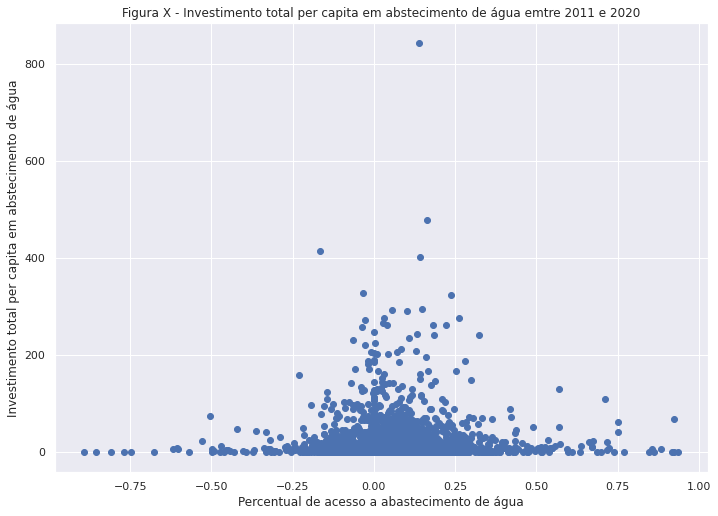

In [107]:
# Relação entre a variação entre o acesso a abastecimento de água entre 2011 e 2020 e os investimentos per capita em água realizados no mesmo período:

fig, ax = plt.subplots()
ax.scatter(df_2['DIF_AG_2011_2020'],df_2['INV_TOTAL_AG_PCP'])
ax.set_xlabel('Variação de acesso a abastecimento de água')
ax.set_ylabel('Investimento total per capita em abstecimento de água')
ax.set_title('Figura X - Relação entre a variação do acesso a abastecimento de água e o investimento total per capita em abstecimento de água emtre 2011 e 2020')
plt.show()


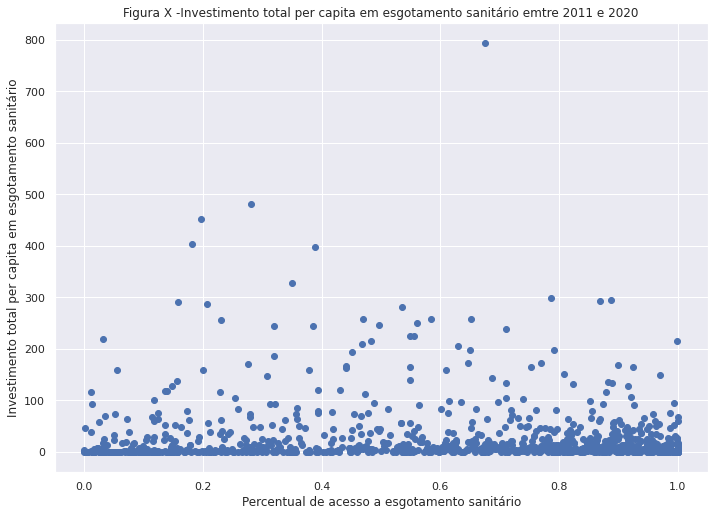

In [105]:
# Relação entre % de acesso a esgoto que existiam em 2011 e os investimentos per capita em esgoto realizados nos 10 anos seguintes

fig, ax = plt.subplots()
ax.scatter(df_2['PERCENT_ES'],df_2['INV_TOTAL_ES_PCP'])
ax.set_xlabel('Percentual de acesso a esgotamento sanitário')
ax.set_ylabel('Investimento total per capita em esgotamento sanitário')
ax.set_title('Figura X - Relação entre % de acesso a esgoto em 2011 e os investimentos per capita em esgoto realizados realizados emtre 2011 e 2020')
plt.show()

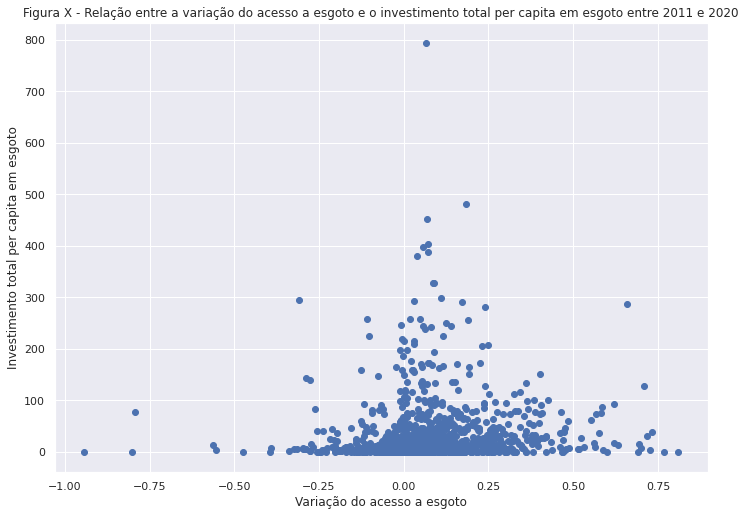

In [110]:
# Relação entre a variação entre o acesso a esgoto entre 2011 e 2020 e os investimentos per capita em esgoto realizados no mesmo período:

fig, ax = plt.subplots()
ax.scatter(df_2['DIF_ES_2011_2020'],df_2['INV_TOTAL_ES_PCP'])
ax.set_xlabel('Variação do acesso a esgoto')
ax.set_ylabel('Investimento total per capita em esgoto')
ax.set_title('Figura X - Relação entre a variação do acesso a esgoto e o investimento total per capita em esgoto entre 2011 e 2020')
plt.show()

In [113]:
# 10 maiores investimentos per capita em água:

df_10_anos.nlargest(10, 'INV_TOTAL_AG_PCP')[['Município','Estado', 'INV_TOTAL_AG_PCP' ]]

,Município,Estado,INV_TOTAL_AG_PCP
3907,Igaratá,SP,842.668476
4504,Laranjeiras do Sul,PR,478.571970
1805,Areia Branca,SE,414.418748
75,Santa Rosa do Purus,AC,401.705543
4921,Penha,SC,327.933834
4443,Godoy Moreira,PR,322.443554
4096,Pereiras,SP,294.579965
3928,Itanhaém,SP,291.525912
3792,Cananéia,SP,291.303360
4441,Foz do Jordão,PR,275.988411


In [114]:
# 10 maiores investimentos per capita em esgoto:

df_10_anos.nlargest(10, 'INV_TOTAL_ES_PCP')[['Município','Estado', 'INV_TOTAL_ES_PCP' ]]


,Município,Estado,INV_TOTAL_ES_PCP
4926,Balneário Piçarras,SC,1353.884137
4747,Balneário Barra do Sul,SC,1338.804791
4843,Ipira,SC,1025.935928
4930,Piratuba,SC,922.218457
413,Taguatinga,TO,824.509523
4133,Praia Grande,SP,793.681051
4801,Curitibanos,SC,679.298738
5347,Pedras Altas,RS,549.398337
4835,Ibirama,SC,508.648925
4851,Itá,SC,490.257249


Text(0, 0.5, 'Total de investimentos per capita')

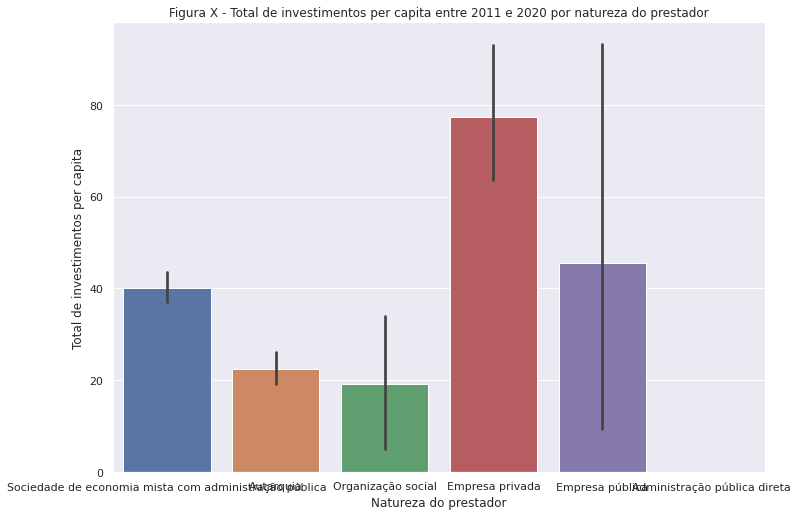

In [131]:
# Análise por natureza do prestador:

# Total de investimentos per capita entre 2011 e 2020 por natureza do prestador:

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='Naturezajurídica', y='INV_TOTAL_PCP', data=df_10_anos.sort_values(by='INV_TOTAL_AG_PCP'))

plt.title('Figura X - Total de investimentos per capita entre 2011 e 2020 por natureza do prestador')
plt.xlabel("Natureza do prestador")
plt.ylabel('Total de investimentos per capita')

Text(0, 0.5, 'Total de investimentos per capita')

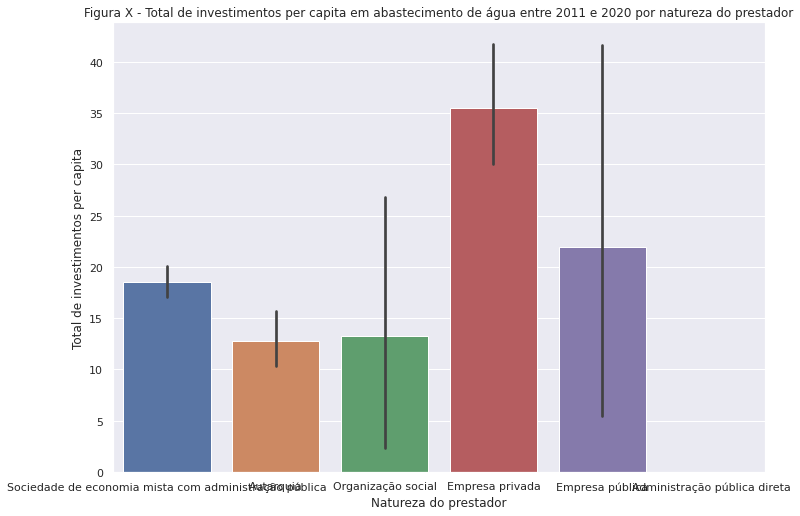

In [132]:
# Total de investimentos per capita em abastecimento de água entre 2011 e 2020 por natureza do prestador:

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='Naturezajurídica', y='INV_TOTAL_AG_PCP', data=df_10_anos.sort_values(by='INV_TOTAL_AG_PCP'))

plt.title('Figura X - Total de investimentos per capita em abastecimento de água entre 2011 e 2020 por natureza do prestador')
plt.xlabel("Natureza do prestador")
plt.ylabel('Total de investimentos em água per capita')

Text(0, 0.5, 'Total de investimentos em esgoto per capita')

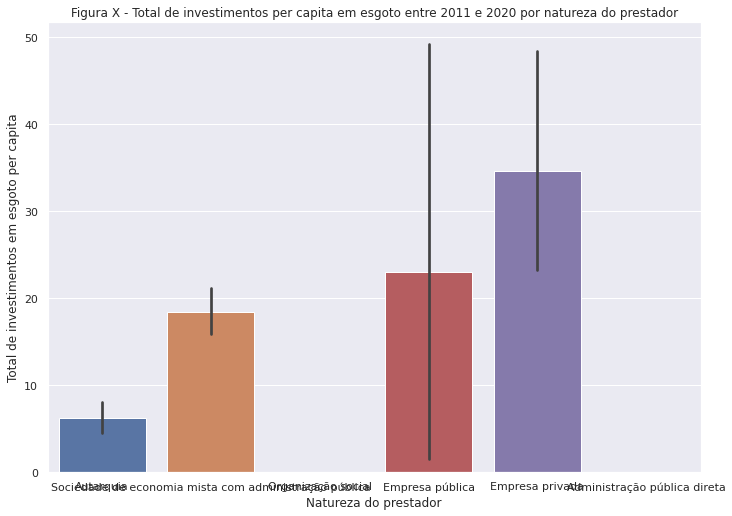

In [134]:
# Total de investimentos per capita em esgoto entre 2011 e 2020 por natureza do prestador:

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='Naturezajurídica', y='INV_TOTAL_ES_PCP', data=df_10_anos.sort_values(by='INV_TOTAL_ES_PCP'))

plt.title('Figura X - Total de investimentos per capita em esgoto entre 2011 e 2020 por natureza do prestador')
plt.xlabel("Natureza do prestador")
plt.ylabel('Total de investimentos em esgoto per capita')

In [ ]:
# Fazer mapa do Brasil por município por natureza do prestador para identificar se tem um padrão de onde tem mais empresas privadas (No Google Data Studio)



In [ ]:
# Fazer mapa do Brasil por município por natureza do prestador para identificar se tem um padrão de onde tem mais investimento percapita (No Google Data Studio)

Text(0, 0.5, 'Variação do percentual de acesso a abastecimento de água')

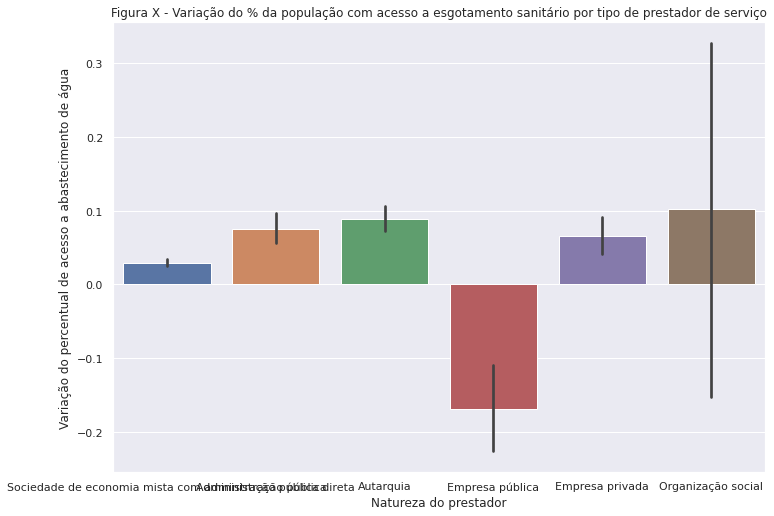

In [144]:
# Verificar se houve diferença entre o avanço no acesso por tipo de prestador de serviço:

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='Naturezajurídica', y='DIF_AG_2011_2020', data=df_10_anos.sort_values(by='DIF_AG_2011_2020'))

plt.title('Figura X - Variação do % da população com acesso a esgotamento sanitário por tipo de prestador de serviço')
plt.xlabel("Natureza do prestador")
plt.ylabel('Variação do percentual de acesso a abastecimento de água')

Text(0, 0.5, 'Variação do percentual de acesso a esgotamento')

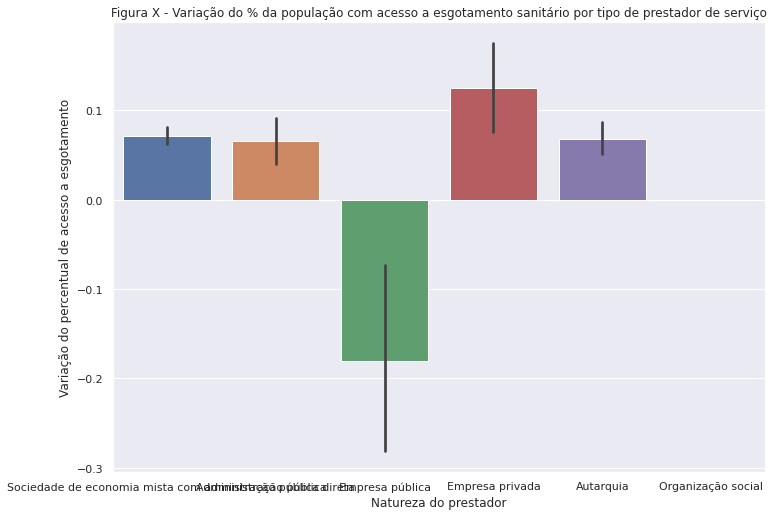

In [145]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x='Naturezajurídica', y='DIF_ES_2011_2020', data=df_10_anos.sort_values(by='DIF_ES_2011_2020'))

plt.title('Figura X - Variação do % da população com acesso a esgotamento sanitário por tipo de prestador de serviço')
plt.xlabel("Natureza do prestador")
plt.ylabel('Variação do percentual de acesso a esgotamento')

## 4 - Análises de impacto

In [ ]:
# Redução das desigualdades regionais

# Plotar mapa do Brasil por município  com o % de acesso em 2011 e outro com o % de acesso em 2020 (Google Data Studio)

In [ ]:
df_2.info()

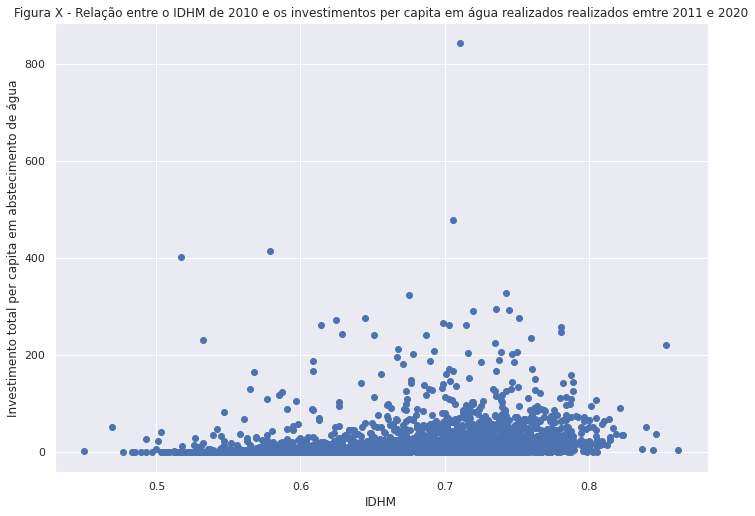

In [139]:
# IDH

# Relação entre IDH de 2010 e os investimentos per capita em água realizados nos 10 anos seguintes

fig, ax = plt.subplots()
ax.scatter(df_2['IDHM'],df_2['INV_TOTAL_AG_PCP'])
ax.set_xlabel('IDHM')
ax.set_ylabel('Investimento total per capita em abstecimento de água')
ax.set_title('Figura X - Relação entre o IDHM de 2010 e os investimentos per capita em água realizados realizados emtre 2011 e 2020')
plt.show()

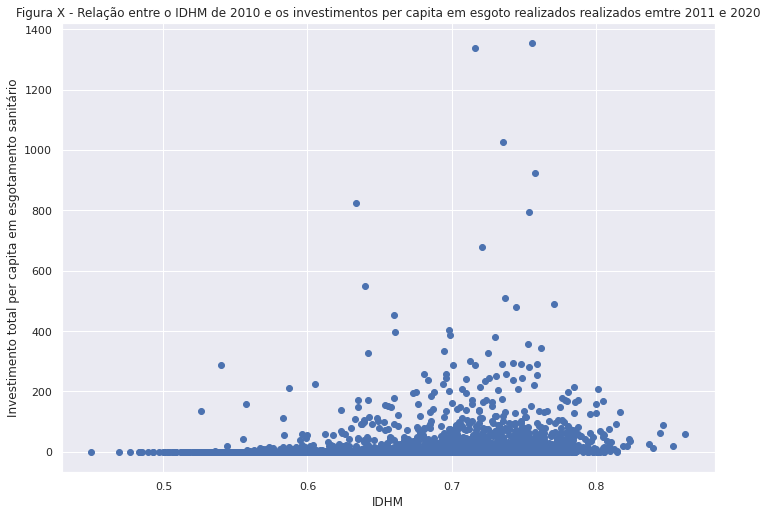

In [140]:
# Relação entre IDH de 2010 e os investimentos per capita em esgoto realizados nos 10 anos seguintes

fig, ax = plt.subplots()
ax.scatter(df_2['IDHM'],df_2['INV_TOTAL_ES_PCP'])
ax.set_xlabel('IDHM')
ax.set_ylabel('Investimento total per capita em esgotamento sanitário')
ax.set_title('Figura X - Relação entre o IDHM de 2010 e os investimentos per capita em esgoto realizados realizados emtre 2011 e 2020')
plt.show()